In [1]:
from math import pi,log10
from control import tf,bode_plot,margin,step_response
import matplotlib.pyplot as plt
import math
import scipy.signal as signal
import scipy.optimize as optimize
import numpy as np
import control as ctrl

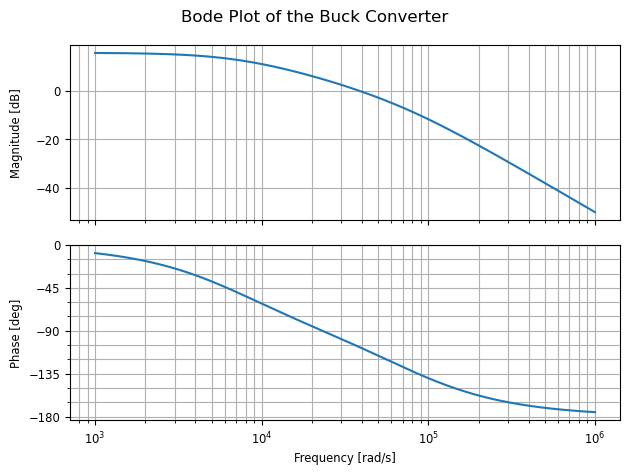

Gain Margin: inf dB
Phase Margin: 73.11648347086609 degrees
Gain Crossover Frequency: nan rad/s
Phase Crossover Frequency: 38275.88707274149 rad/s


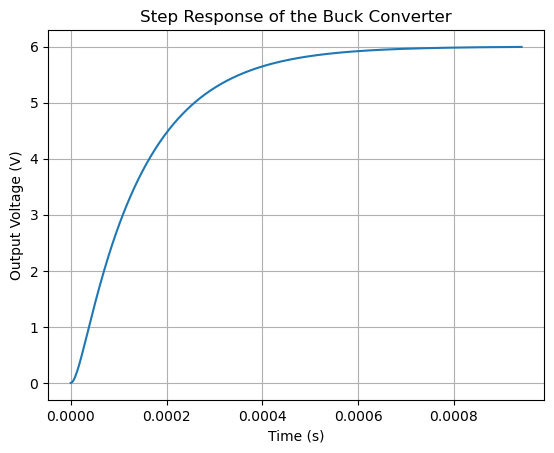

In [2]:
# create lapalce variable
s = tf('s')
# buck converter parameters
Vin = 12
Vout = 6
RL = 6
D = 0.5
L = 150e-6  # inductance in Henry
C = 2.08e-6  # capacitance in Farad

# transfer function for the buck converter
G = RL / (1 + s * L  + s**2 * L * C*RL)

# Bode plot
plt.figure()
bode_plot(G, dB=True)
plt.suptitle('Bode Plot of the Buck Converter')
plt.show()

# Gain and phase margins
gm, pm, Wcg, Wcp = margin(G)
print(f"Gain Margin: {gm} dB")
print(f"Phase Margin: {pm} degrees")
print(f"Gain Crossover Frequency: {Wcg} rad/s")
print(f"Phase Crossover Frequency: {Wcp} rad/s")

# Step response
time, response = step_response(G)

plt.figure()
plt.plot(time, response)
plt.title('Step Response of the Buck Converter')
plt.xlabel('Time (s)')
plt.ylabel('Output Voltage (V)')
plt.grid(True)
plt.show()

In [3]:

L = 150e-6  # Inductance in Henry
C = 2.08e-6  # Capacitance in Farad

# Calculate the cutoff frequency
f_c = 1 / (2 * math.pi * math.sqrt(L * C))  # Cutoff frequency in Hz

f_c_kHz = f_c / 1e3  # Convert to kHz

f_c_kHz

9.01037434667716

In [4]:
zeta = RL * math.sqrt(C/L) /2

R = 2 * math.sqrt(L / C)

print(zeta,R)

0.3532704346531139 16.984155512168936


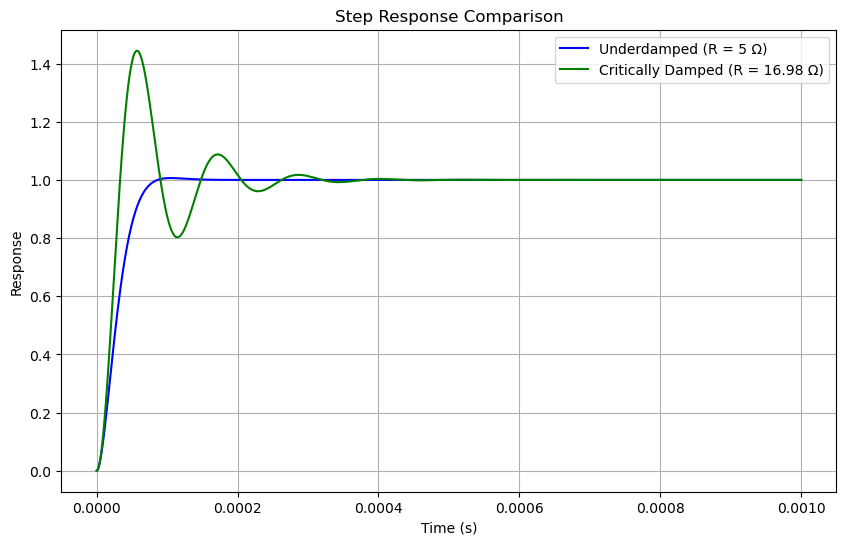

0.2943920288775949 0.9997553300683124


In [7]:
from scipy.signal import lti, step,lsim

# Given values
Lo = 150e-6        # Output inductance in H
Co = 2.08e-6       # Output capacitance in F
R1 = 5             # Load resistance in Ohms (underdamped)
R2 = 16.98         # Load resistance in Ohms (critically damped)

# Natural frequency
omega_n = 1 / np.sqrt(Lo * Co)

# Damping ratios
zeta1 = R1 * np.sqrt(Co / Lo) / 2
zeta2 = R2 * np.sqrt(Co / Lo) / 2

# Define the transfer functions
system_underdamped = lti([R1], [R1*Lo * Co, Lo, R1])
system_critically_damped = lti([R2], [R2*Lo * Co, Lo, R2])
# Time vector for simulation
t = np.linspace(0, 0.001, 1000)  # Adjusted time vector for clearer response

# Step responses
t_underdamped, y_underdamped = step(system_underdamped, T=t)
t_critically_damped, y_critically_damped = step(system_critically_damped, T=t)

# Plot the step responses
plt.figure(figsize=(10, 6))
plt.plot(t_underdamped, y_underdamped, label='Underdamped (R = 5 Ω)', color='blue')
plt.plot(t_critically_damped, y_critically_damped, label='Critically Damped (R = 16.98 Ω)', color='green')
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title('Step Response Comparison')
plt.legend()
plt.grid(True)
plt.show()

print(zeta1,zeta2)

In [6]:
print(R)

16.984155512168936


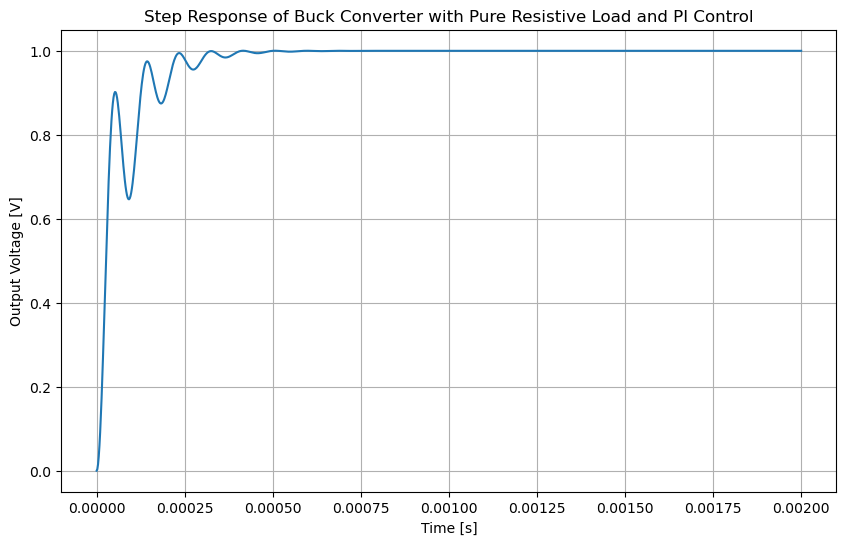

In [10]:
# Define component values for the buck converter with resistive load
L = 150e-6  # Inductance (H)
C = 2.08e-6  # Capacitance (F)
R_load = 5  # Load resistance (ohms)
Vin = 12  # Input voltage (V)

# Transfer function of the buck converter with resistive load (second-order system)
num = [Vin]  # Numerator (input voltage)
den = [L*C, R_load*C, 1]  # Denominator (LCs^2 + RCs + 1)
plant_tf = ctrl.TransferFunction(num, den)

# Design PI Controller
Kp = 0.05  # Proportional gain
Ki = 1500  # Integral gain
PI_controller = ctrl.TransferFunction([Kp, Ki], [1, 0])

# Closed-loop system with PI control
closed_loop_tf = ctrl.feedback(PI_controller * plant_tf)

# Time for simulation
time = np.linspace(0, 0.002, 1000)  # 0 to 50 ms

# Step response
time, response = ctrl.step_response(closed_loop_tf, time)

# Plotting the step response
plt.figure(figsize=(10, 6))
plt.plot(time, response)
plt.title("Step Response of Buck Converter with Pure Resistive Load and PI Control")
plt.xlabel("Time [s]")
plt.ylabel("Output Voltage [V]")
plt.grid(True)
plt.show()